In [12]:
import tensorflow as tf
from tensorflow import keras 
from keras.models import load_model
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join



ModuleNotFoundError: No module named 'tensorflow.python.trackable'

## Load model

In [9]:
new_model = load_model('Eye_Ep100.h5')
new_model.summary()
new_model.get_weights()
new_model.optimizer

NameError: name 'load_model' is not defined

[[0.48373058 0.51626945]]
Actual: 01_dr.JPG
predict: Dr 51.63 %


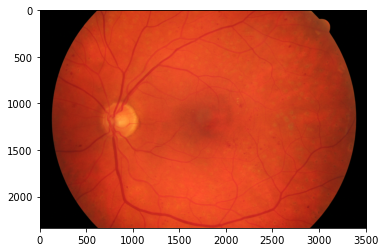

[[0.28767827 0.7123217 ]]
Actual: 02_dr.JPG
predict: Dr 71.23 %


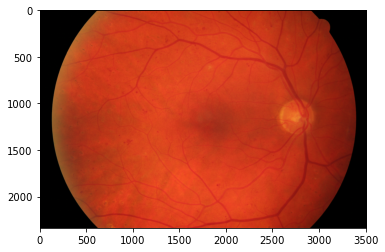

[[0.46787968 0.5321203 ]]
Actual: 03_dr.JPG
predict: Dr 53.21 %


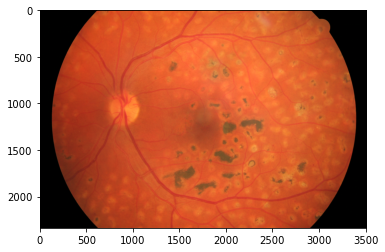

[[0.5381694  0.46183062]]
Actual: 04_dr.JPG
predict: Normal 53.82 %


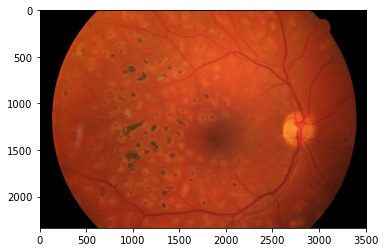

[[0.32136938 0.6786306 ]]
Actual: 05_dr.JPG
predict: Dr 67.86 %


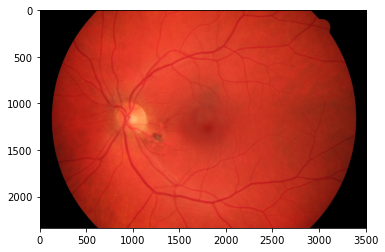

[[0.17250866 0.82749134]]
Actual: 06_dr.JPG
predict: Dr 82.75 %


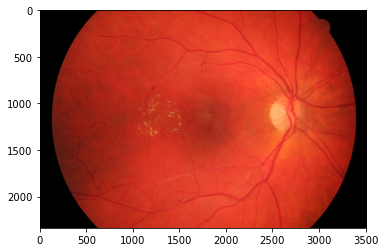

[[0.36576083 0.63423914]]
Actual: 07_dr.JPG
predict: Dr 63.42 %


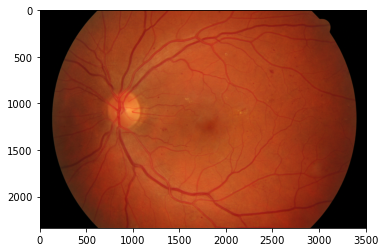

[[0.42099944 0.5790006 ]]
Actual: 08_dr.JPG
predict: Dr 57.9 %


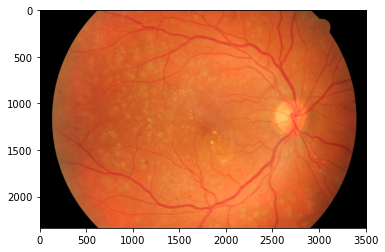

[[0.3649635 0.6350365]]
Actual: 09_dr.JPG
predict: Dr 63.5 %


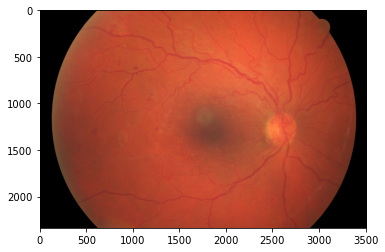

[[0.23928465 0.7607153 ]]
Actual: 10_dr.JPG
predict: Dr 76.07 %


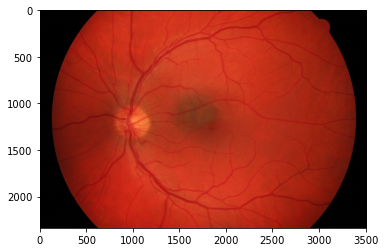

[[0.30217734 0.6978227 ]]
Actual: 11_dr.JPG
predict: Dr 69.78 %


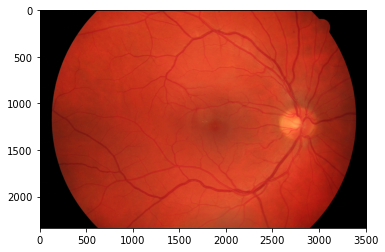

[[0.5384044  0.46159554]]
Actual: 12_dr.JPG
predict: Normal 53.84 %


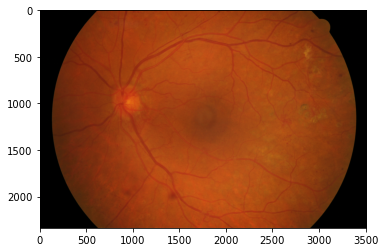

[[0.5809197 0.4190803]]
Actual: 13_dr.JPG
predict: Normal 58.09 %


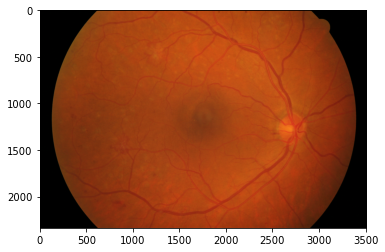

[[0.26895118 0.7310488 ]]
Actual: 14_dr.JPG
predict: Dr 73.1 %


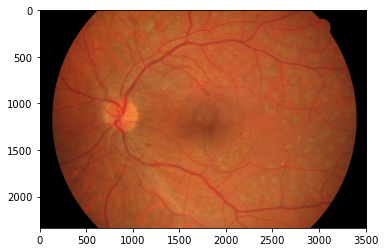

[[0.12297513 0.8770249 ]]
Actual: 15_dr.JPG
predict: Dr 87.7 %


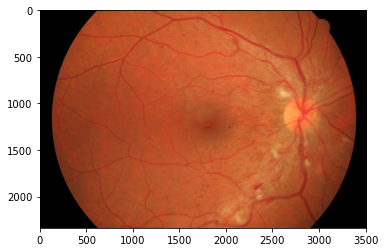

In [21]:
testpath = 'test_opt/' 
# testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
testImg = [testpath]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":
           
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(128,128))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = new_model.predict(rimg)
          label = ['Normal','Dr']
          result = label[np.argmax(predict)]
          print(predict)
          print('Actual: '+str(item))   # Read actual value from filename
          print('predict: '+str(result)+' ' + str(np.round(predict.max()*100,2))+ ' %')
          predict = predict*100
          plt.imshow(ori)
          plt.show()